### Super Store Sales Analysis and Profit Return Prediction

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://images.unsplash.com/photo-1630342654882-aed9e2e86f24?q=80&w=1974&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D", width=1300, height=500)

### Introduction

This Project looks to explore a dataset containing information on a small retail business

Objectives include:

1. Analyse the sales data and pinpoint areas and opportunities for the business to experience a growth boost.

    This would be done by providing insights and answers to particular business questions tailored to the data on board.

        1.  Best Selling Category
        2.  Most Profitable Category
        3.  Best Selling Sub-Category
        4.  Most Profitable Sub-Category
        5.  Most Profitable Regions and Cities
        6.  Overall Sales (Over The Years)
        7.  Most Selling and Profitable Products

2. Next, We will carry out some machine learning on the dataset, in an attempt to predict sale returns based of information available in a record.

    Model would be a tensorflow, sequential model
    
        Layers and units would be adjusted based on model's response.

### Environment Preparation

In [2]:
# Importing libraries
# Importing alias for easy reading

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Reading data from csv
df = pd.read_csv('Sample - Superstore.csv')

# Data Exploration

In [3]:
# Preview first 5 rows of data set
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1.0,CA-2016-152156,11/8/2016,11/11/2016,NaN,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,2.0,0.0,41.9136
1,1,NaN,NaN,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.0,219.5820
2,2,3.0,NaN,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.0,6.8714
3,3,4.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,NaN,Sean O'Donnell,Consumer,United States,...,33311.0,South,NaN,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,NaN,-383.0310
4,4,5.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,NaN,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.2,2.5164


In [4]:
# Preview last 5 rows of data set
df.tail()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9989,9990.0,NaN,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,...,NaN,South,NaN,Furniture,NaN,NaN,25.248,3.0,NaN,4.1028
9990,9990,9991.0,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2.0,0.0,15.6332
9991,9991,9992.0,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2.0,0.2,19.3932
9992,9992,NaN,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",NaN,4.0,0.0,13.3200
9993,9993,9994.0,CA-2017-119914,5/4/2017,5/9/2017,NaN,CC-12220,Chris Cortes,Consumer,United States,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2.0,0.0,NaN


In [5]:
df = df.drop(df.columns[:2], axis=1)

df.shape

(9994, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       8995 non-null   object 
 1   Order Date     8995 non-null   object 
 2   Ship Date      8995 non-null   object 
 3   Ship Mode      8995 non-null   object 
 4   Customer ID    8995 non-null   object 
 5   Customer Name  8995 non-null   object 
 6   Segment        8995 non-null   object 
 7   Country        8995 non-null   object 
 8   City           8995 non-null   object 
 9   State          8995 non-null   object 
 10  Postal Code    8995 non-null   float64
 11  Region         8995 non-null   object 
 12  Product ID     8995 non-null   object 
 13  Category       8995 non-null   object 
 14  Sub-Category   8995 non-null   object 
 15  Product Name   8995 non-null   object 
 16  Sales          8995 non-null   float64
 17  Quantity       8995 non-null   float64
 18  Discount

## Data Cleaning

### First Stage - Handling Duplicate Records

In [7]:
# Find the number of duplicate data
df.duplicated().sum()

0

### Second Stage - Handling Missing Data

In [8]:
# To get the number of records with null values...

df.isnull().sum()

Order ID         999
Order Date       999
Ship Date        999
Ship Mode        999
Customer ID      999
Customer Name    999
Segment          999
Country          999
City             999
State            999
Postal Code      999
Region           999
Product ID       999
Category         999
Sub-Category     999
Product Name     999
Sales            999
Quantity         999
Discount         999
Profit           999
dtype: int64

<Axes: >

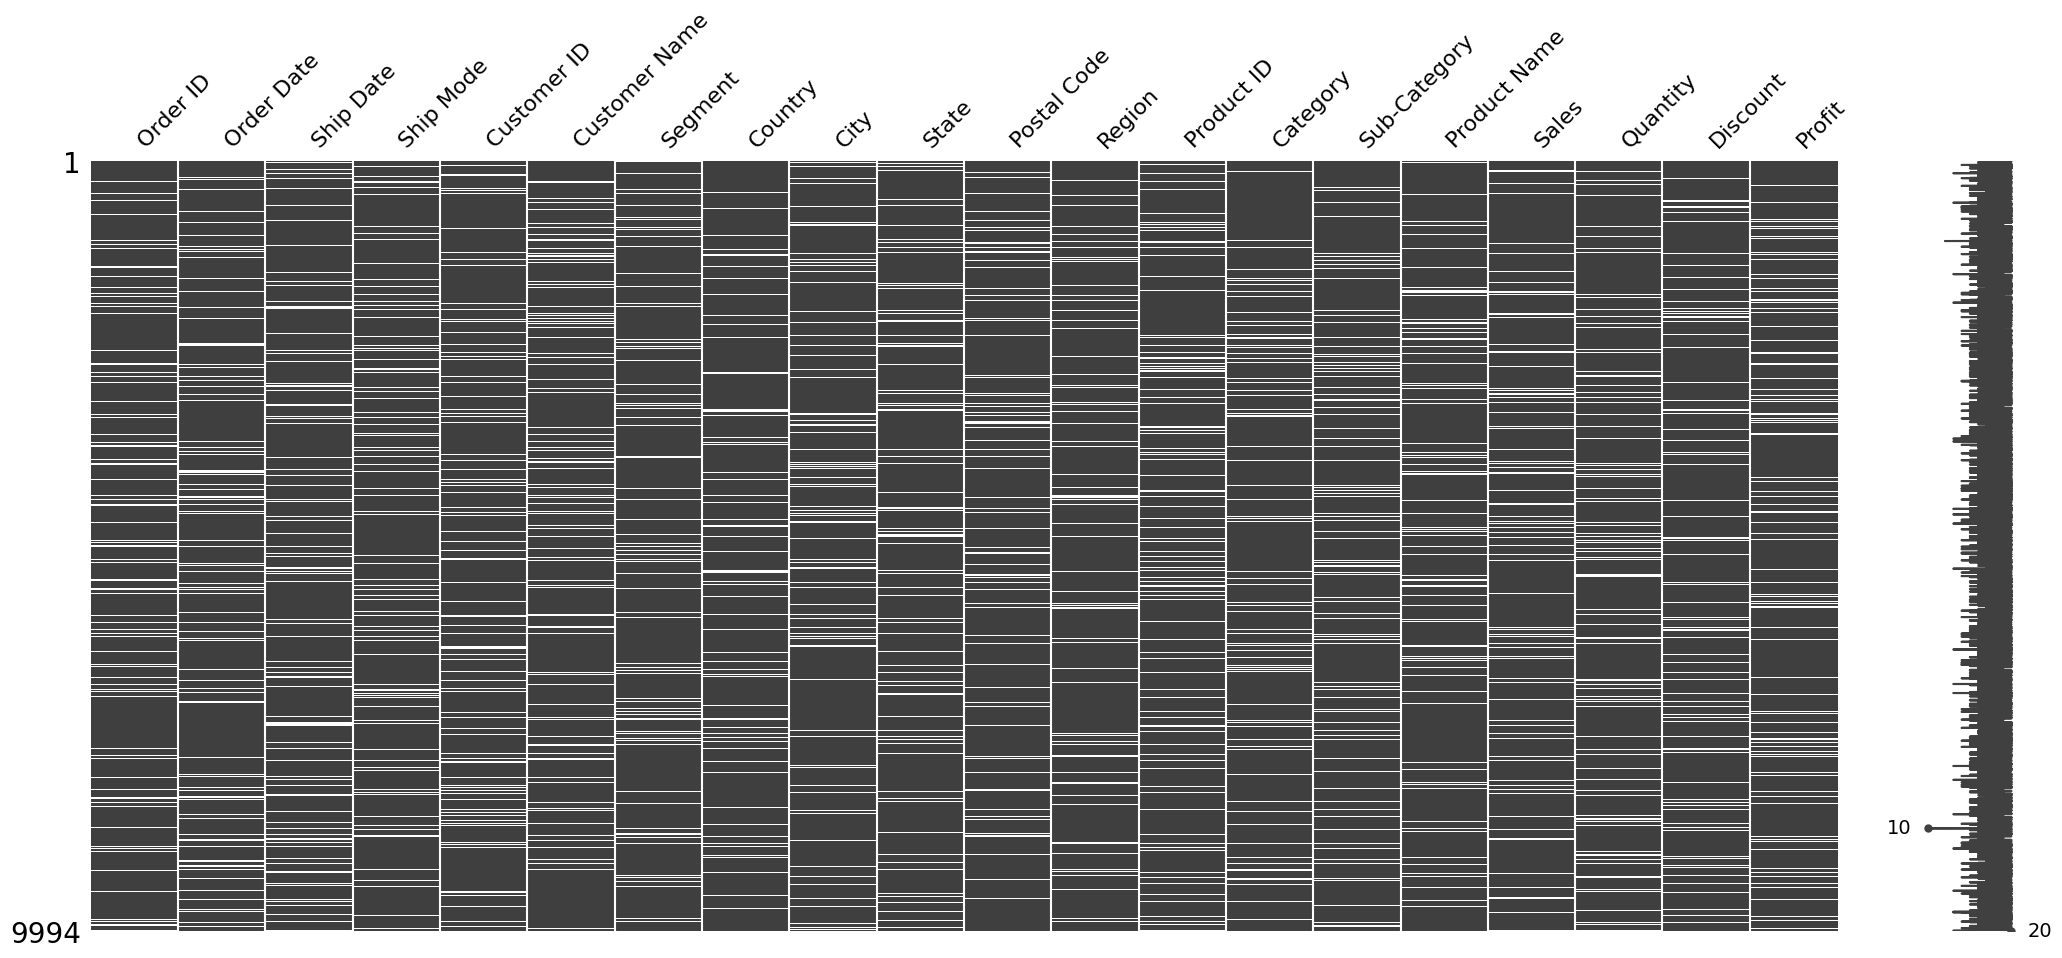

In [9]:
# Visualizing the distribution of missing data
msno.matrix(df)

##### Mean Imputation For Numeric Features and (Most Frequent) Imputation for Categorical Features

In [10]:
# Identifing categorical and numeric columns
categorical_cols = df.select_dtypes(include='object')
numeric_cols = df.select_dtypes(include='number')

# Imputing missing values for numeric columns with the mean
df[numeric_cols.columns] = df[numeric_cols.columns].fillna(numeric_cols.mean())

# Imputing missing values for categorical columns with the mode (most frequent value)
for col in categorical_cols.columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

<Axes: >

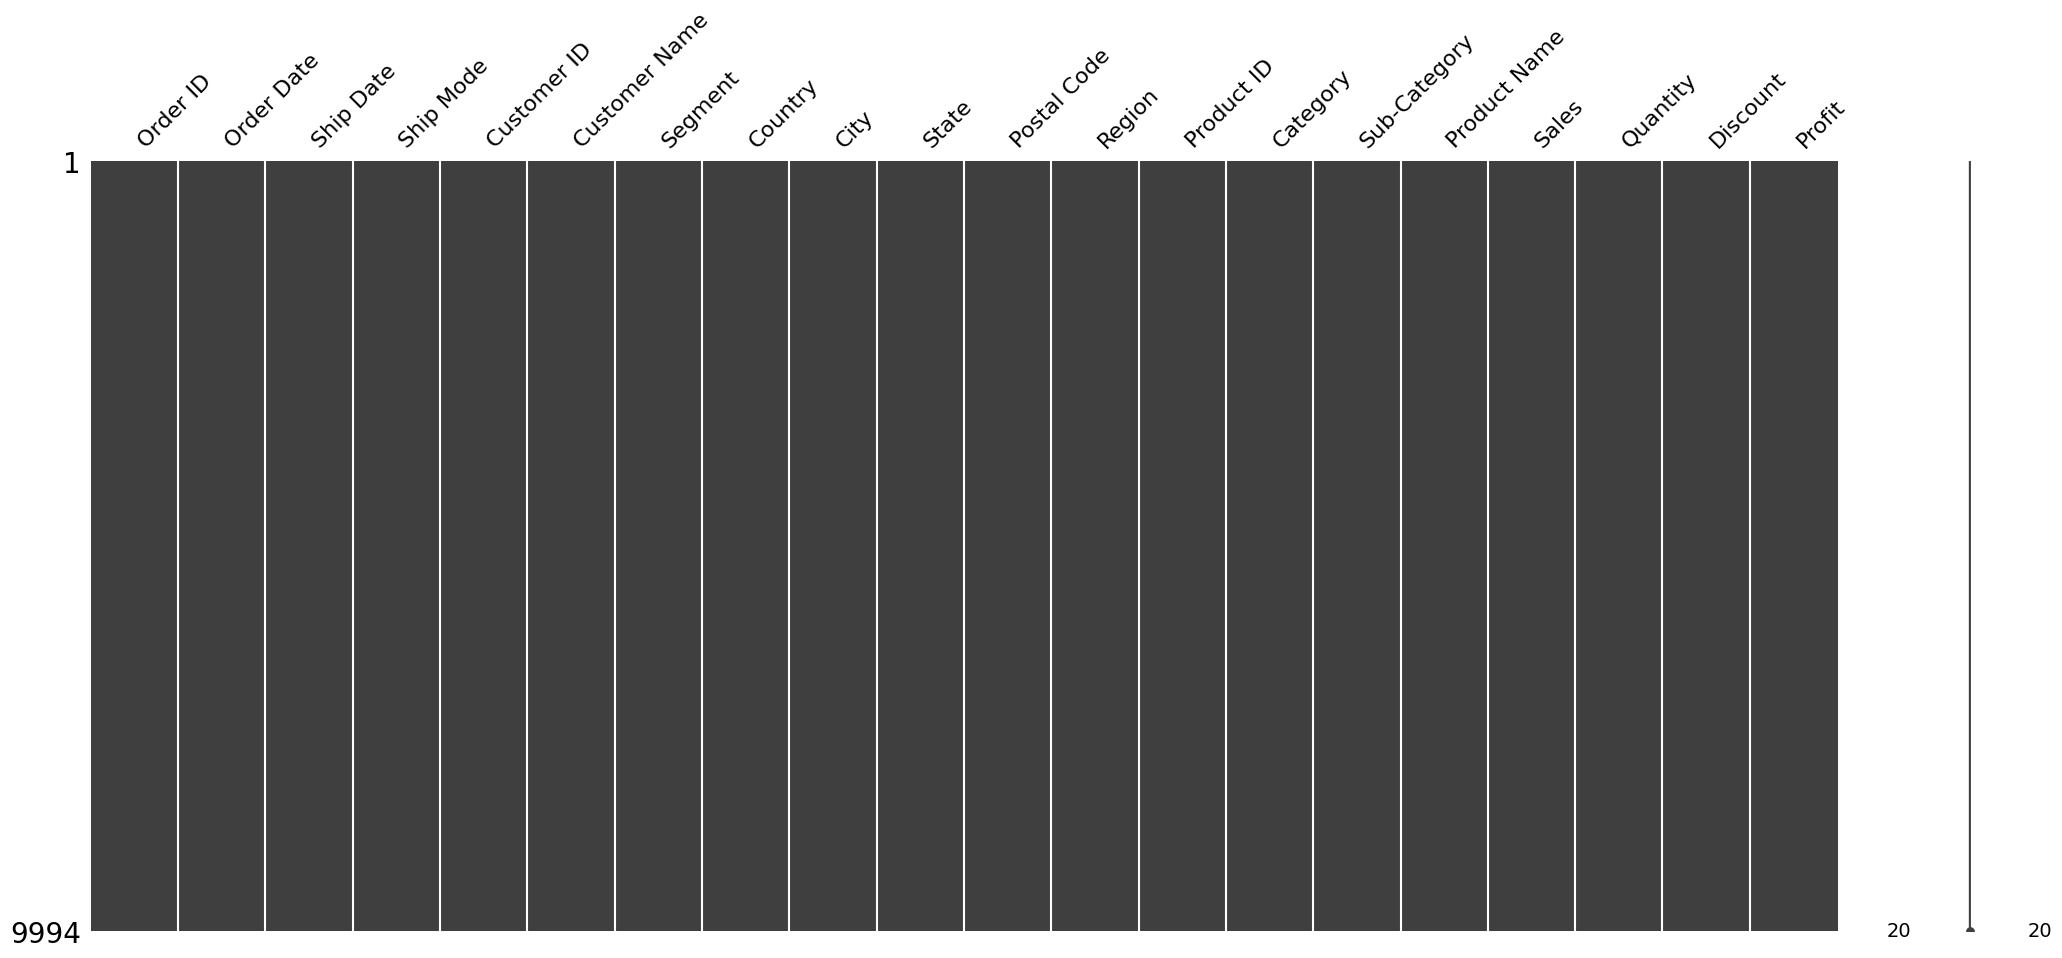

In [11]:
# Re-visualizing the distribution of missing data
msno.matrix(df)

In [12]:
# To get the number of records with null values...

df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Feature Engineering - Adding a Column for Profit Return Percentage

In [13]:
df ['Profit Percentage'] = (df.Profit / df.Sales) * 100
df ['Cost Price'] = (df.Sales - df.Profit)

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Percentage,Cost Price
0,CA-2016-152156,11/8/2016,11/11/2016,Standard Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.864435,2.0,0.00000,41.9136,18.15507,188.950835
1,CA-2017-100111,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,California,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940000,3.0,0.00000,219.5820,30.00000,512.358000
2,CA-2017-100111,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2.0,0.00000,6.8714,47.00000,7.748600
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,WB-21850,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-PA-10001970,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577500,5.0,0.15569,-383.0310,-40.00000,1340.608500
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,William Brown,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2.0,0.20000,2.5164,11.25000,19.851600


### Descriptive Analysis

In [14]:
df.describe(include = "all")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Percentage,Cost Price
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
unique,4721,1223,1316,4,793,793,3,1,524,49,...,1849,3,17,1844,NaN,NaN,NaN,NaN,NaN,NaN
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,...,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN,NaN,NaN
freq,1012,1035,1033,6356,1035,1033,5642,9994,1818,2798,...,1016,6422,2369,1044,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,230.864435,3.790773,0.155690,27.614049,23.018765,203.250386
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,592.548581,2.117348,0.194531,216.429005,90.890360,544.827003
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,-406.420331,-2273.357165
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.440000,2.000000,0.000000,2.401000,5.952975,13.016800
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,70.990000,3.000000,0.155690,10.886400,26.000000,53.917500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,230.864435,5.000000,0.200000,27.614049,37.000000,218.675700


In [15]:
# To read the data as a time series, we have to pass special arguments to the read_csv command:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')

In [16]:
#Converting Order Date to Datetime
df['Order Date']= pd.to_datetime(df['Order Date'])

#Creating a Month Year Column
df['Year Month'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [17]:
sales_trend = pd.DataFrame(df.groupby('Year Month')['Sales'].sum().reset_index())
sales_trend.head()

,Year Month,Sales
0,2014-01,13119.428043
1,2014-02,4649.966869
2,2014-03,54793.537259
3,2014-04,27128.241347
4,2014-05,22628.820085


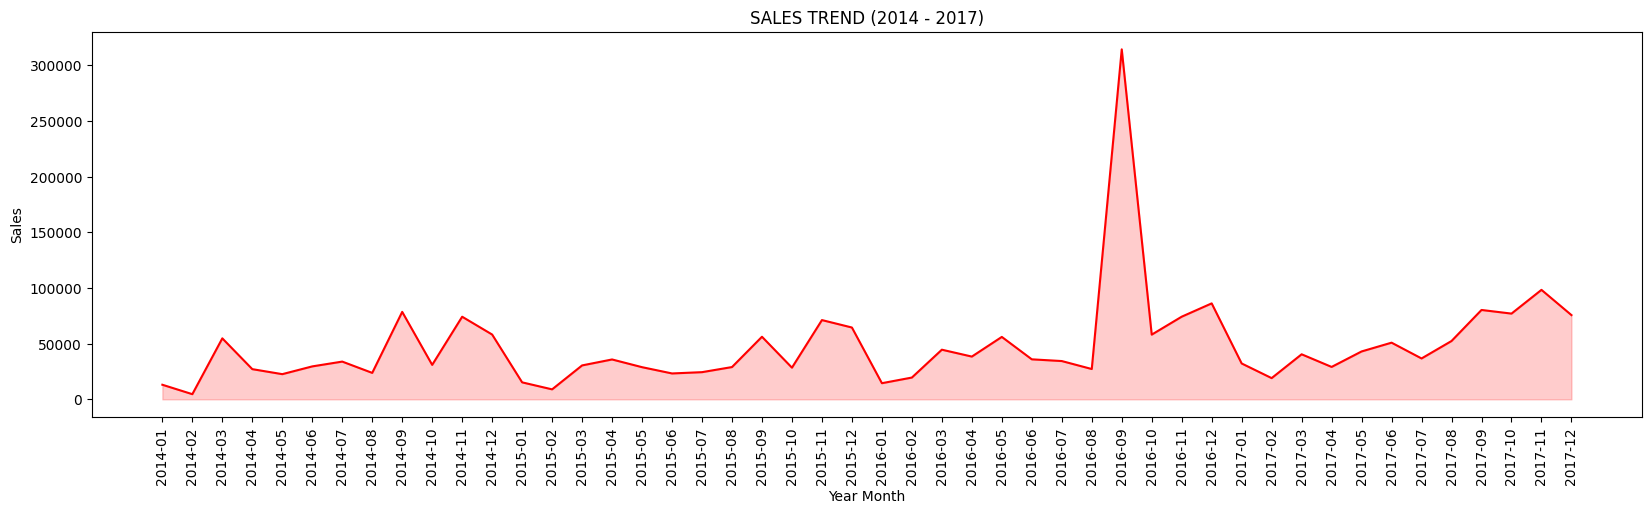

In [18]:
# Data
x = sales_trend['Year Month']
y = sales_trend['Sales']

# Plotting
plt.figure(figsize=(20, 5))
plt.xticks(rotation='vertical', size=10)
plt.plot(x, y, color='red')
plt.fill_between(x, y, color='red', alpha=0.2)
plt.title('SALES TREND (2014 - 2017)')
plt.ylabel('Sales')
plt.xlabel('Year Month')
plt.show()

### Discoveries

### Exploratory Data Analysis

Remember when we said we would provide insights and answers to certain business questions.

First, We would explore the 'Categories'

    1. Sales
    2. Profit
    3. Quantity

In [19]:
# Grouping Sales, Profit and Quantity by Category

category_analysis = pd.DataFrame(df.groupby(['Category']) [['Sales', 'Profit', 'Quantity']].sum())

category_analysis.head()

,Sales,Profit,Quantity
Category,,,
Furniture,656880.586109,22327.996592,7254.828349
Office Supplies,932731.240894,131575.324081,24343.232907
Technology,717647.333026,122071.482082,6286.920623


##### We'd Get These on Graphs For easier Visualization

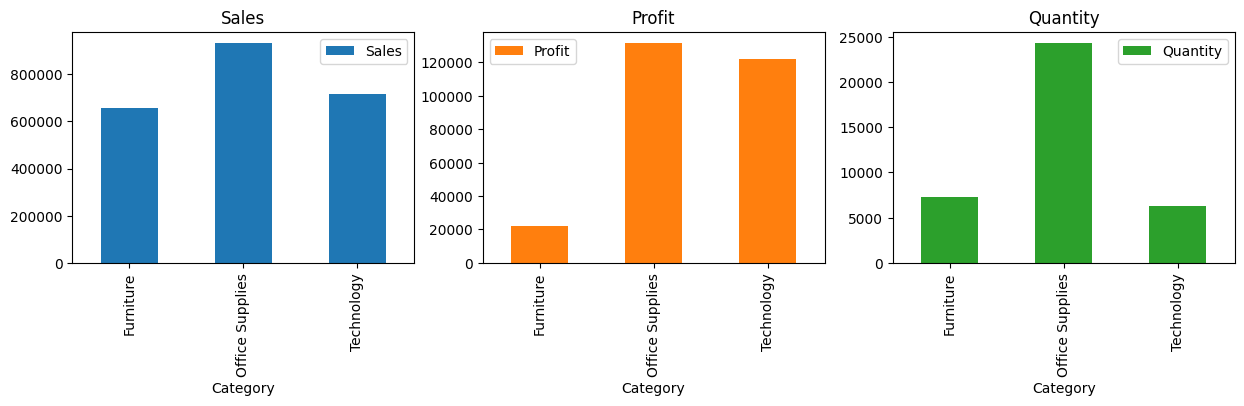

In [20]:
category_analysis.plot(kind='bar', subplots=True, layout=(1,3), figsize=(15,3))
plt.show()

### We would do the same for 'Sub Categories'

In [21]:
# Grouping Sales, Profit and Quantity by Sub-Sub_Category

Sub_Category_analysis = pd.DataFrame(df.groupby(['Sub-Category']) [['Sales', 'Profit', 'Quantity']].sum())

Sub_Category_analysis_Sales = Sub_Category_analysis.sort_values('Sales', ascending=False)

Sub_Category_analysis_Sales.head(30)

,Sales,Profit,Quantity
Sub-Category,,,
Binders,418197.176565,45604.980143,9229.459255
Chairs,285922.766949,24949.968981,2138.027904
Phones,284780.009992,39553.188843,2956.123402
Storage,195091.879642,18778.668168,2800.726404
Tables,181854.744975,-14119.047236,1147.141634
Accessories,151989.090949,37154.254361,2639.772540
Machines,147076.793259,3684.208090,406.116954
Copiers,126063.470608,45233.975744,226.535409
Bookcases,103050.464401,-2881.786377,801.280044


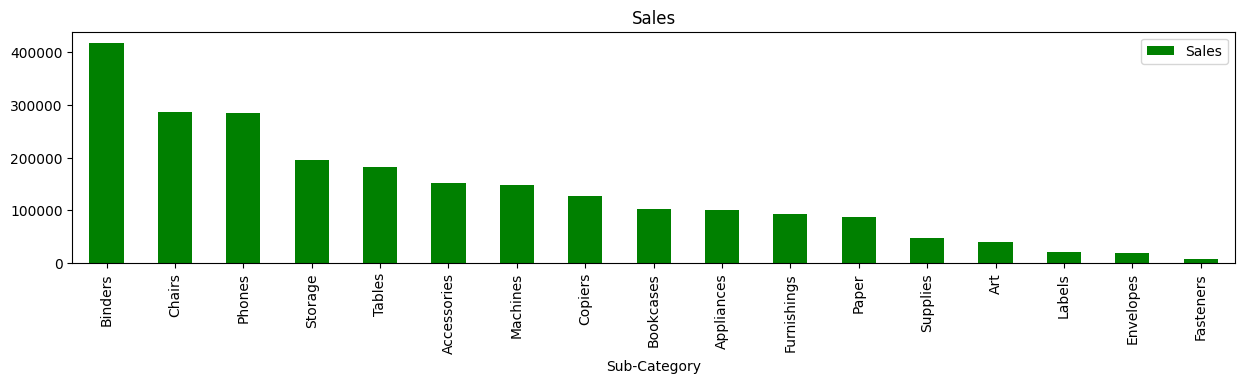

In [22]:
Sales_SubCategory = pd.DataFrame(df.groupby(['Sub-Category']) [['Sales']].sum().sort_values('Sales', ascending=False))

Sales_SubCategory.head()

Sales_SubCategory.plot(kind='bar', subplots=True, figsize=(15,3), color=['green'])
plt.show()

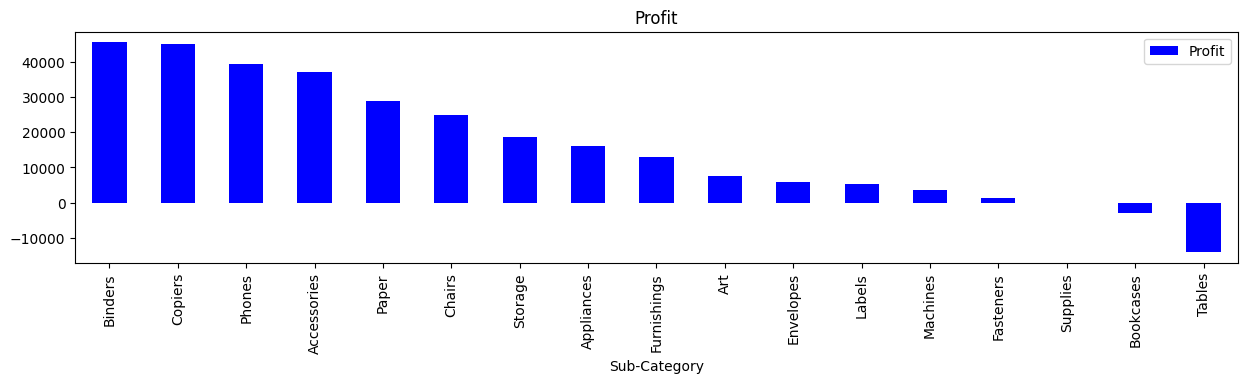

In [23]:
Profit_SubCategory = pd.DataFrame(df.groupby(['Sub-Category']) [['Profit']].sum().sort_values('Profit', ascending=False))

Profit_SubCategory.head()

Profit_SubCategory.plot(kind='bar', subplots=True, figsize=(15,3), color=['blue'])
plt.show()

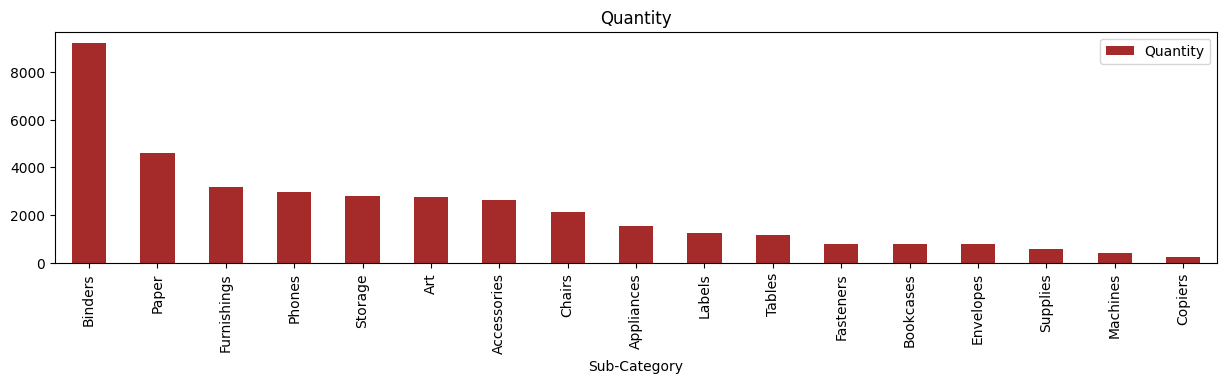

In [24]:
Quantity_SubCategory = pd.DataFrame(df.groupby(['Sub-Category']) [['Quantity']].sum().sort_values('Quantity', ascending=False))

Quantity_SubCategory.head()

Quantity_SubCategory.plot(kind='bar', subplots=True, figsize=(15,3), color=['brown'])
plt.show()

In [25]:
# Grouping Sales, Profit and Quantity by Cities

City_analysis = pd.DataFrame(df.groupby(['City']) [['Sales', 'Profit', 'Quantity']].sum().sort_values('Sales', ascending= False))

Top_Cities = City_analysis[:10]
Bottom_Cities = City_analysis.tail(10)

Top_Cities.head()

,Sales,Profit,Quantity
City,,,
New York City,457535.220966,76934.094080,6792.385214
Los Angeles,160631.607253,27806.620655,2635.471039
San Francisco,103882.804168,13789.096979,1740.375542
Philadelphia,102188.353387,-8300.754867,1758.793997
Seattle,99507.835995,19559.037251,1410.886270


### Let's take a look at Cities with the Highest and lowest Sales, Profit, and Quantity Sold in

### Top Cities

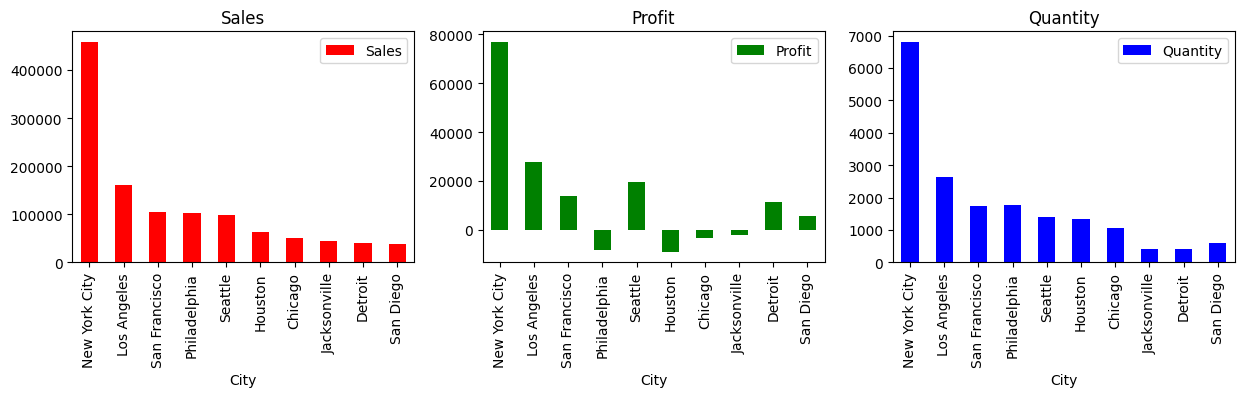

In [26]:
Top_Cities.plot(kind='bar', subplots=True, layout=(1,3), figsize=(15,3), color=['red', 'green', 'blue'])
plt.show()

### Bottom Cities

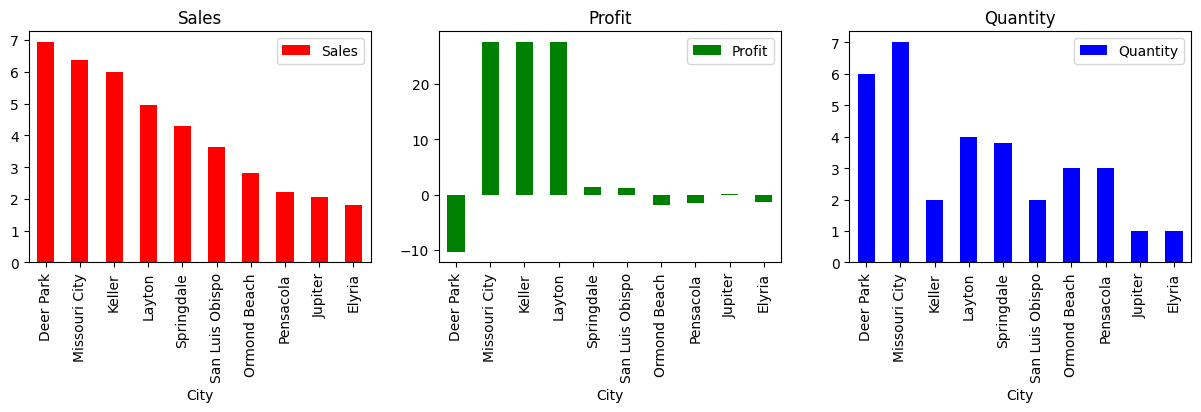

In [27]:
Bottom_Cities.plot(kind='bar', subplots=True, layout=(1,3), figsize=(15,3), color=['red', 'green', 'blue'])
plt.show()

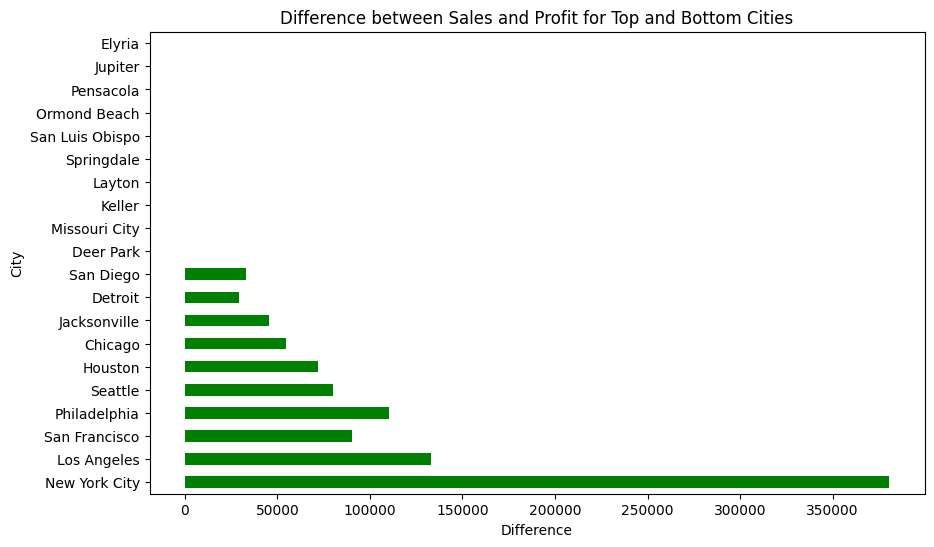

In [28]:
import matplotlib.pyplot as plt

Cities = pd.concat([Top_Cities, Bottom_Cities])
diff = Cities['Sales'] - Cities['Profit']
colors = ['red' if x < 0 else 'green' for x in diff]

ax = diff.plot(kind='barh', figsize=(10,6), color=colors)
ax.set_xlabel('Difference')
ax.set_ylabel('City')
ax.set_title('Difference between Sales and Profit for Top and Bottom Cities')
plt.show()


In [29]:
df.to_csv('data.csv', index=False)